In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
TMP_df = pd.read_csv('item-sales-summary-2021-11-01-2021-12-10.csv')
TMP_df.sort_values(by='Items Sold', ascending=False)

,Item Name,Item Variation,SKU,Category,Items Sold,Gross Sales,Items Refunded,Refunds,Discounts & Comps,Net Sales,Tax,Unit,Units Sold,Units Refunded
24,Credit,Regular,NaN,Uncategorized,506,$506.00,0,$0.00,$0.00,$506.00,$0.00,ea,506,0
51,Separate Vinyl,Regular,NaN,Uncategorized,91,"$2,275.00",0,$0.00,$0.00,"$2,275.00",$0.00,ea,91,0
28,Hoodie,L,NaN,Uncategorized,54,"$2,300.00",0,$0.00,$0.00,"$2,300.00",$0.00,ea,54,0
31,Hoodie,XL,NaN,Uncategorized,50,"$2,180.00",0,$0.00,$0.00,"$2,180.00",$0.00,ea,50,0
29,Hoodie,M,NaN,Uncategorized,41,"$1,765.00",0,$0.00,$0.00,"$1,765.00",$0.00,ea,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Shirt,3XL,NaN,Uncategorized,1,$25.00,0,$0.00,$0.00,$25.00,$0.00,ea,1,0
3,Alone CD,3XL,NaN,Uncategorized,1,$25.00,0,$0.00,$0.00,$25.00,$0.00,ea,1,0
2,Alone CD,2XL,NaN,Uncategorized,1,$25.00,0,$0.00,$0.00,$25.00,$0.00,ea,1,0
1,1,Regular,NaN,Uncategorized,1,$20.00,0,$0.00,$0.00,$20.00,$0.00,ea,1,0


In [3]:
TMP_df['Gross Sales'] = TMP_df['Gross Sales'].str.lstrip('$').str.replace(',','').astype('float')
TMP_df = TMP_df.sort_values(by='Gross Sales', ascending=False)
TMP_df['Item Name'] = TMP_df['Item Name'].astype('str')
TMP_df['Item Variation'] = TMP_df['Item Variation'].str.replace('2XL', 'XXL').str.replace('2X', 'XXL').str.replace('3XL', 'XXXL').str.replace('3X', 'XXXL')



In [4]:
shirts = ['Alone Shirt', 'ColoR Sun', 'Hoodie', 'Wax Shirt', 'Separate Shirt', 'Long Sleeve New']
TMP_df = TMP_df[(TMP_df['Item Name'].isin(shirts))]
TMP_insight_df = TMP_df[['Item Name', 'Item Variation', 'Items Sold']]

In [5]:
TMP_items = TMP_insight_df.groupby('Item Name')['Items Sold'].sum().reset_index()
total_sold = TMP_items['Items Sold'].sum()
TMP_items['Percentage'] = TMP_items['Items Sold']/total_sold
TMP_items['Items To Order'] = TMP_items['Items Sold']*1.3333
TMP_items

,Item Name,Items Sold,Percentage,Items To Order
0,Alone Shirt,113,0.156077,150.6629
1,ColoR Sun,62,0.085635,82.6646
2,Hoodie,197,0.272099,262.6601
3,Long Sleeve New,104,0.143646,138.6632
4,Separate Shirt,123,0.169890,163.9959
5,Wax Shirt,125,0.172652,166.6625


<AxesSubplot:xlabel='Item Name', ylabel='Items Sold'>

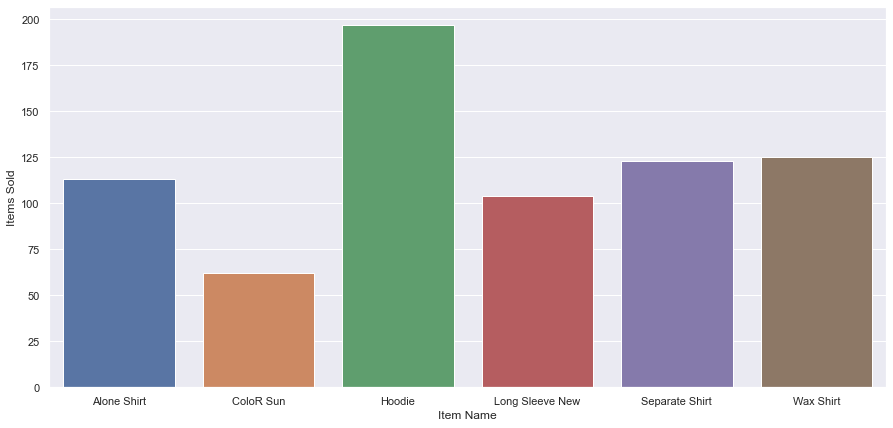

In [6]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = TMP_items, x='Item Name', y='Items Sold')

In [7]:
TMP_sizes = TMP_insight_df.groupby('Item Variation')['Items Sold'].sum().reset_index()
total_sold = TMP_items['Items Sold'].sum()
TMP_sizes['Percentage'] = TMP_sizes['Items Sold']/total_sold
TMP_sizes = TMP_sizes.reindex([2, 1, 0, 3, 4, 5])
TMP_sizes

,Item Variation,Items Sold,Percentage
2,S,100,0.138122
1,M,172,0.237569
0,L,210,0.290055
3,XL,163,0.225138
4,XXL,55,0.075967
5,XXXL,24,0.033149


<AxesSubplot:xlabel='Item Variation', ylabel='Items Sold'>

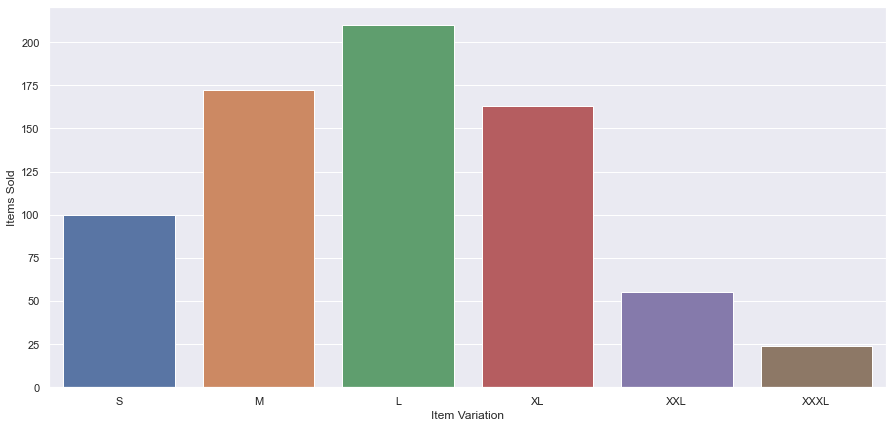

In [8]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = TMP_sizes, x='Item Variation', y='Items Sold')

In [10]:
TMP_insight_df['Projected Sold'] = TMP_insight_df['Items Sold']*1.3333
TMP_insight_df.sort_values(by='Item Name')

,Item Name,Item Variation,Items Sold,Projected Sold
13,Alone Shirt,XL,20,26.6660
9,Alone Shirt,XXXL,7,9.3331
8,Alone Shirt,XXL,11,14.6663
12,Alone Shirt,S,17,22.6661
10,Alone Shirt,L,31,41.3323
11,Alone Shirt,M,27,35.9991
18,ColoR Sun,XXL,4,5.3332
22,ColoR Sun,S,8,10.6664
21,ColoR Sun,M,15,19.9995
23,ColoR Sun,XL,15,19.9995


In [16]:
hoodie_df = TMP_insight_df[(TMP_insight_df['Item Name'] == 'Hoodie')]
shirt_df = TMP_insight_df[(TMP_insight_df['Item Name'] != 'Hoodie')]
hoodie_df = hoodie_df.reindex([30,29,28,31,26,27])

<AxesSubplot:xlabel='Item Variation', ylabel='Items Sold'>

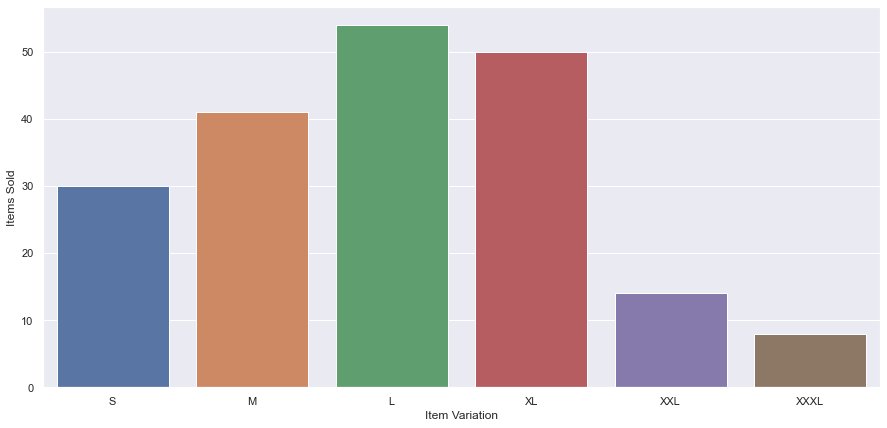

In [19]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = hoodie_df, x='Item Variation', y='Items Sold')

<AxesSubplot:xlabel='Item Variation', ylabel='Items Sold'>

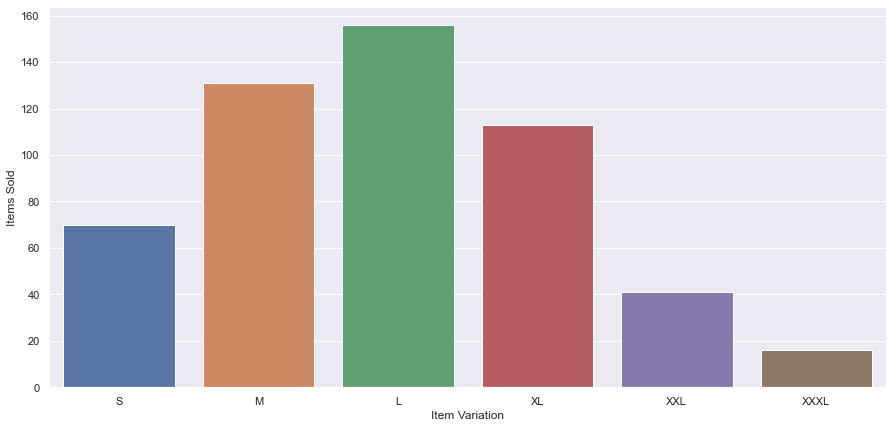

In [23]:
shirt_df = shirt_df.groupby('Item Variation')['Items Sold'].sum().reset_index()
shirt_df = shirt_df.reindex([2,1,0,3,4,5])
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data = shirt_df, x='Item Variation', y='Items Sold')